In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, isnan, when, count, isnull

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spark = SparkSession.builder \
    .appName("Flight Data Analysis") \
    .getOrCreate()

In [5]:
import glob
import os
os.getcwd()
folder_path = 'raw'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
df = spark.read.csv(csv_files,
                       sep = ',',
                       inferSchema = True,
                       header = True)

In [8]:
num_entries = 29193782

In [22]:
null_counts = df.select([count(col(c)).alias(c) for c in df.columns]).collect()[0].asDict()
print(null_counts)

{'Year': 29193782, 'Quarter': 29193782, 'Month': 29193782, 'DayofMonth': 29193782, 'DayOfWeek': 29193782, 'FlightDate': 29193782, 'Marketing_Airline_Network': 29193782, 'Operated_or_Branded_Code_Share_Partners': 29193782, 'DOT_ID_Marketing_Airline': 29193782, 'IATA_Code_Marketing_Airline': 29193782, 'Flight_Number_Marketing_Airline': 29193782, 'Originally_Scheduled_Code_Share_Airline': 3873, 'DOT_ID_Originally_Scheduled_Code_Share_Airline': 3873, 'IATA_Code_Originally_Scheduled_Code_Share_Airline': 3873, 'Flight_Num_Originally_Scheduled_Code_Share_Airline': 3873, 'Operating_Airline ': 29193782, 'DOT_ID_Operating_Airline': 29193782, 'IATA_Code_Operating_Airline': 29193782, 'Tail_Number': 28926171, 'Flight_Number_Operating_Airline': 29193782, 'OriginAirportID': 29193782, 'OriginAirportSeqID': 29193782, 'OriginCityMarketID': 29193782, 'Origin': 29193782, 'OriginCityName': 29193782, 'OriginState': 29193782, 'OriginStateFips': 29193782, 'OriginStateName': 29193782, 'OriginWac': 29193782, 'D

In [36]:
columns_with_few_nulls = [col_name for col_name, count_val in null_counts.items() if count_val > 0.9*num_entries]
#columns_with_no_nulls = [col_name for col_name, count_val in null_counts.items() if count_val != 0]
print(columns_with_few_nulls)
#print(columns_with_all_nulls)
#df.select(*columns_with_nulls).show()

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline ', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Fligh

In [41]:
newdf = df.select(columns_with_few_nulls)
newdf.select(newdf.columns[0:10]).show()

+----+-------+-----+----------+---------+----------+-------------------------+---------------------------------------+------------------------+---------------------------+
|Year|Quarter|Month|DayofMonth|DayOfWeek|FlightDate|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|DOT_ID_Marketing_Airline|IATA_Code_Marketing_Airline|
+----+-------+-----+----------+---------+----------+-------------------------+---------------------------------------+------------------------+---------------------------+
|2019|      3|    7|        24|        3|2019-07-24|                       G4|                                     G4|                   20368|                         G4|
|2019|      3|    7|        29|        1|2019-07-29|                       G4|                                     G4|                   20368|                         G4|
|2019|      3|    7|         7|        7|2019-07-07|                       G4|                                     G4|                   203

In [43]:
newdf.select(newdf.columns[10:19]).show()

+-------------------------------+------------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+
|Flight_Number_Marketing_Airline|Operating_Airline |DOT_ID_Operating_Airline|IATA_Code_Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginAirportSeqID|OriginCityMarketID|
+-------------------------------+------------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+
|                           1246|                G4|                   20368|                         G4|      249NV|                           1246|          14112|           1411206|             33195|
|                           2106|                G4|                   20368|                         G4|      319NV|                           2106|          10423|           1042302|

In [47]:
newdf.select(newdf.columns[19:33]).show()

+------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+----+--------------------+---------+-------------+--------------+
|Origin|      OriginCityName|OriginState|OriginStateFips|OriginStateName|OriginWac|DestAirportID|DestAirportSeqID|DestCityMarketID|Dest|        DestCityName|DestState|DestStateFips| DestStateName|
+------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+----+--------------------+---------+-------------+--------------+
|   PIE|  St. Petersburg, FL|         FL|             12|        Florida|       33|        10431|         1043105|           30431| AVL|       Asheville, NC|       NC|           37|North Carolina|
|   AUS|          Austin, TX|         TX|             48|          Texas|       74|        14761|         1476107|           34761| SFB|         Sanford, FL|       FL|           12|       Florida|
|   GRI|    Gra

In [49]:
newdf.select(newdf.columns[33:50]).show()

+-------+----------+-------+--------+---------------+--------+--------------------+----------+-------+---------+--------+------+----------+-------+--------+---------------+--------+
|DestWac|CRSDepTime|DepTime|DepDelay|DepDelayMinutes|DepDel15|DepartureDelayGroups|DepTimeBlk|TaxiOut|WheelsOff|WheelsOn|TaxiIn|CRSArrTime|ArrTime|ArrDelay|ArrDelayMinutes|ArrDel15|
+-------+----------+-------+--------+---------------+--------+--------------------+----------+-------+---------+--------+------+----------+-------+--------+---------------+--------+
|     36|      1511|   1533|    22.0|           22.0|     1.0|                   1| 1500-1559|   13.0|     1546|    1652|   7.0|      1644|   1659|    15.0|           15.0|     1.0|
|     33|      2002|   2010|     8.0|            8.0|     0.0|                   0| 2000-2059|   16.0|     2026|    2338|   6.0|      2335|   2344|     9.0|            9.0|     0.0|
|     85|      1118|   1118|     0.0|            0.0|     0.0|                   0| 1100-1

In [50]:
newdf.select(newdf.columns[50:62]).show()

+------------------+----------+---------+--------+--------------+-----------------+-------+-------+--------+-------------+------------------+---------+
|ArrivalDelayGroups|ArrTimeBlk|Cancelled|Diverted|CRSElapsedTime|ActualElapsedTime|AirTime|Flights|Distance|DistanceGroup|DivAirportLandings|Duplicate|
+------------------+----------+---------+--------+--------------+-----------------+-------+-------+--------+-------------+------------------+---------+
|                 1| 1600-1659|      0.0|     0.0|          93.0|             86.0|   66.0|    1.0|   519.0|            3|                 0|        N|
|                 0| 2300-2359|      0.0|     0.0|         153.0|            154.0|  132.0|    1.0|   994.0|            4|                 0|        N|
|                -1| 1100-1159|      0.0|     0.0|         146.0|            141.0|  128.0|    1.0|   971.0|            4|                 0|        N|
|                 3| 1800-1859|      0.0|     0.0|         104.0|            116.0|   95

In [53]:
repeat_cols = ["Marketing_Airline_Network", "Operated_or_Branded_Code_Share_Partners", "IATA_Code_Marketing_Airline", "Operating_Airline ", "IATA_Code_Operating_Airline"]
print(newdf.select([count(col(c)).alias(c) for c in repeat_cols]).collect()[0].asDict())

{'Marketing_Airline_Network': 29193782, 'Operated_or_Branded_Code_Share_Partners': 29193782, 'IATA_Code_Marketing_Airline': 29193782, 'Operating_Airline ': 29193782, 'IATA_Code_Operating_Airline': 29193782}


In [55]:
print(newdf.select(repeat_cols).distinct().count())

39


In [61]:
cols_to_keep = ["Year", "Month", "DayofMonth", "Origin", "OriginCityName", "DestCityName", "DepDelay", "ArrDelay", "Cancelled", "CRSElapsedTime", "ActualElapsedTime"]
my_df = newdf.select(cols_to_keep)
my_df.show()

+----+-----+----------+------+--------------------+--------------------+--------+--------+---------+--------------+-----------------+
|Year|Month|DayofMonth|Origin|      OriginCityName|        DestCityName|DepDelay|ArrDelay|Cancelled|CRSElapsedTime|ActualElapsedTime|
+----+-----+----------+------+--------------------+--------------------+--------+--------+---------+--------------+-----------------+
|2019|    7|        24|   PIE|  St. Petersburg, FL|       Asheville, NC|    22.0|    15.0|      0.0|          93.0|             86.0|
|2019|    7|        29|   AUS|          Austin, TX|         Sanford, FL|     8.0|     9.0|      0.0|         153.0|            154.0|
|2019|    7|         7|   GRI|    Grand Island, NE|       Las Vegas, NV|     0.0|    -5.0|      0.0|         146.0|            141.0|
|2019|    7|         7|   AUS|          Austin, TX|         Memphis, TN|    43.0|    55.0|      0.0|         104.0|            116.0|
|2019|    7|         8|   IND|    Indianapolis, IN|  St. Peter

## Which Origin Cities had the most delayed flights?

In [79]:
count_delay = my_df.select(["Origin", "DepDelay"]).groupBy("Origin")\
        .agg(count(F.when(col("DepDelay") > 0, 1)).alias("DelayCount"), 
             count(F.when(col("DepDelay") < 0, 1)).alias("EarlyCount"),
            count("*").alias("TotalCount")).orderBy(col("TotalCount").desc())
pandas_delay = count_delay.toPandas()

In [92]:
pdf = pandas_delay.copy()
pdf["OnTimeCount"] = pdf["TotalCount"] - pdf["DelayCount"] - pdf["EarlyCount"]

In [93]:
top_20 = pdf.head(20)
top_20

,Origin,DelayCount,EarlyCount,TotalCount,OnTimeCount
0,ORD,423172,854619,1375187,97396
1,ATL,431582,828942,1371796,111272
2,DEN,465001,616559,1170585,89025
3,DFW,381306,643151,1104266,79809
4,CLT,269963,579589,907841,58289
5,LAX,284043,507672,851262,59547
6,SEA,233671,443438,725350,48241
7,IAH,198517,441003,689477,49957
8,PHX,248009,380043,677155,49103
9,LAS,262752,349872,666148,53524


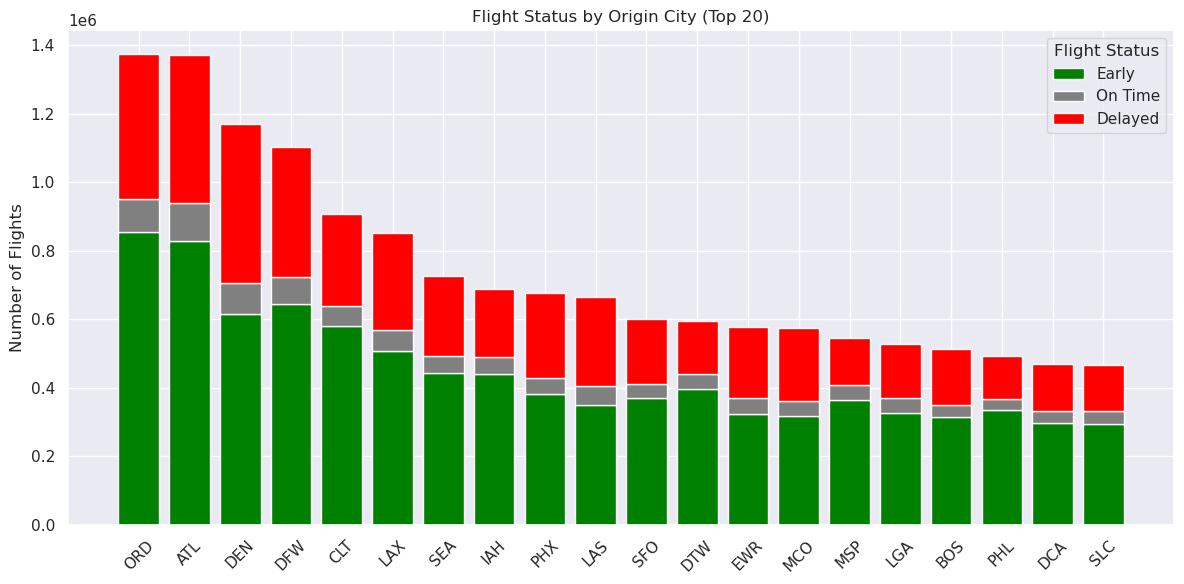

In [94]:
count_delay = my_df.select(["Origin", "DepDelay"]).groupBy("Origin")\
        .agg(count(F.when(col("DepDelay") > 0, 1)).alias("DelayCount"), 
             count(F.when(col("DepDelay") < 0, 1)).alias("EarlyCount"),
            count("*").alias("TotalCount")).orderBy(col("TotalCount").desc())
pandas_delay = count_delay.toPandas()# Assuming pdf has these columns: OriginCity, DelayedFlights, EarlyFlights, OnTimeFlights

# Bar positions
cities = top_20["Origin"]
x = np.arange(len(cities))

# Heights
early = top_20["EarlyCount"]
on_time = top_20["OnTimeCount"]
delayed = top_20["DelayCount"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, early, label="Early", color="green")
plt.bar(x, on_time, bottom=early, label="On Time", color="gray")
plt.bar(x, delayed, bottom=early + on_time, label="Delayed", color="red")

# Labels and formatting
plt.xticks(x, cities, rotation=45)
plt.ylabel("Number of Flights")
plt.title("Flight Status by Origin City (Top 20)")
plt.legend(title="Flight Status")
plt.tight_layout()
plt.show()

In [6]:
year_delay = my_df.select(["Year", "DepDelay"]).groupBy("Origin")\
        .agg(count(F.when(col("DepDelay") > 0, 1)).alias("DelayCount"), 
             count(F.when(col("DepDelay") < 0, 1)).alias("EarlyCount"),
            count("*").alias("TotalCount")).orderBy(col("TotalCount").desc())
pandas_year_delay = count_delay.toPandas()

NameError: name 'my_df' is not defined